In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import json
from citipy import citipy
import openweathermapy.core as ow

In [6]:
# Save config information
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
url = "http://api.openweathermap.org/data/2.5/weather?"

In [7]:
latitude=np.random.uniform(low=-90.00, high=90.00, size=2000)
longitude=np.random.uniform(low=-180.00, high=180.00, size=2000)


In [8]:
lat_lon=[]

In [9]:
for x in range(len(latitude)):
    coordinate_pair=(latitude[x],longitude[x])
    lat_lon.append((latitude[x],longitude[x]))
    
    

In [10]:
cities=[]

for pair in lat_lon:
    lat, lon = pair
    city= citipy.nearest_city(lat, lon).city_name
    if city not in cities:
        cities.append(city)
    

In [11]:
len(cities)

739

In [12]:
weather_df= pd.DataFrame({"City":cities})
weather_df.head()

,City
0,vaitupu
1,hermanus
2,pisco
3,nikolskoye
4,jamestown


In [13]:
weather_df["Lat"]=""
weather_df["Temp"]=""
weather_df["Humidity"]=""
weather_df["Clouds"]=""
weather_df["Wind"]=""

weather_df.head()

,City,Lat,Temp,Humidity,Clouds,Wind
0,vaitupu,,,,,
1,hermanus,,,,,
2,pisco,,,,,
3,nikolskoye,,,,,
4,jamestown,,,,,


In [24]:
city=[]

for index, row in weather_df.iterrows():
    city=row["City"]
    query_url=  "http://api.openweathermap.org/data/2.5/weather?units=imperial&q=%s&appid=%s" % (city.replace(" ","+"), api_key)
    weather=req.get(query_url).json()
    
    try:
        weather_df.set_value(index, "Lat", weather["coord"]["lat"])
        weather_df.set_value(index, "Temp", weather["main"]["temp"])
        weather_df.set_value(index, "Humidity", weather["main"]["humidity"])
        weather_df.set_value(index, "Clouds", weather["clouds"]["all"])
        weather_df.set_value(index, "Wind", weather["wind"]["speed"])
        print("--", end="")
                   
    except:
        continue
        




----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [25]:
weather_df

,City,Lat,Temp,Humidity,Clouds,Wind
1,hermanus,-34.42,65.24,71,56,5.84
2,pisco,-13.70,66.2,88,0,13.87
4,jamestown,42.10,32.67,63,90,20.8
5,san juan,-31.54,59.3,99,80,2.59
6,shirokiy,49.76,-9.74,68,36,3.6
7,minbu,20.18,81.89,62,0,7.9
8,ribeira grande,38.52,66.95,96,100,17.18
9,cape town,-33.93,66.2,68,0,5.82
11,beloha,-25.17,88.32,61,0,5.32
12,bredasdorp,-34.53,68,72,56,19.46


In [26]:
weather_df['Lat'].replace('', np.nan, inplace=True)


In [28]:
weather_df.dropna(subset=["Lat"], inplace=True)
weather_df.head()

,City,Lat,Temp,Humidity,Clouds,Wind
1,hermanus,-34.42,65.24,71,56,5.84
2,pisco,-13.70,66.2,88,0,13.87
4,jamestown,42.10,32.67,63,90,20.8
5,san juan,-31.54,59.3,99,80,2.59
6,shirokiy,49.76,-9.74,68,36,3.6


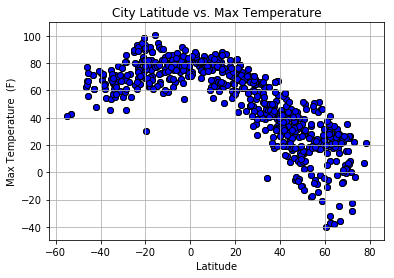

In [31]:
plt.scatter(weather_df.Lat, weather_df.Temp, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature  (F)")
plt.grid(True)
plt.show()

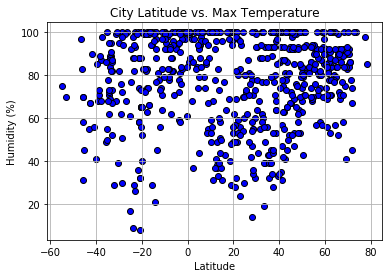

In [32]:
plt.scatter(weather_df.Lat, weather_df.Humidity, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()

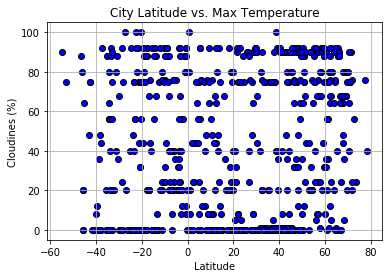

In [33]:
plt.scatter(weather_df.Lat, weather_df.Clouds, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Cloudines (%)")
plt.grid(True)
plt.show()

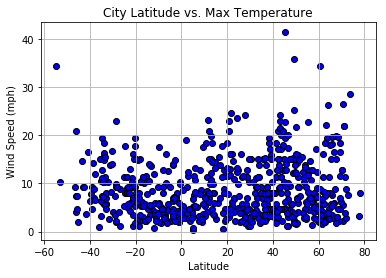

In [34]:
plt.scatter(weather_df.Lat, weather_df.Wind, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.show()

In [40]:
weather_df.to_csv('Homework6.csv', sep=',')